# Part I - Flights
## by Nouhaila Ait Bella

## Introduction


In this project I'm going to analyze a data set with information about flights in the United States for 2007.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
flights=pd.read_csv('2007.csv')

In [3]:
#copy 
df=flights.copy()

In [4]:
#showing info
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 7453215 non-null int64
Month                7453215 non-null int64
DayofMonth           7453215 non-null int64
DayOfWeek            7453215 non-null int64
DepTime              7292467 non-null float64
CRSDepTime           7453215 non-null int64
ArrTime              7275288 non-null float64
CRSArrTime           7453215 non-null int64
UniqueCarrier        7453215 non-null object
FlightNum            7453215 non-null int64
TailNum              7453193 non-null object
ActualElapsedTime    7275288 non-null float64
CRSElapsedTime       7452221 non-null float64
AirTime              7275288 non-null float64
ArrDelay             7275288 non-null float64
DepDelay             7292467 non-null float64
Origin               7453215 non-null object
Dest                 7453215 non-null object
Distance             7453215 non-null int64
TaxiIn               7453215 non-

In [5]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [6]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,...,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,...,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,...,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,...,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,...,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [8]:
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6817547,2007,11,2,5,1820.0,1828,1932.0,1943,CO,1807,...,7,13,0,NaN,0,0,0,0,0,0
1428705,2007,3,11,7,1521.0,1526,1901.0,1859,UA,288,...,19,13,0,NaN,0,0,0,0,0,0
373633,2007,1,23,2,911.0,920,1011.0,1027,FL,576,...,5,11,0,NaN,0,0,0,0,0,0
2215003,2007,4,17,2,635.0,640,743.0,740,MQ,3256,...,21,7,0,NaN,0,0,0,0,0,0
7144399,2007,12,2,7,631.0,635,905.0,935,WN,3928,...,4,10,0,NaN,0,0,0,0,0,0


In [9]:
df.duplicated().sum()

27

In [10]:
#drop duplicated rows
df=df.drop_duplicates()

In [11]:
df.shape

(7453188, 29)

In [12]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3029219,2007,5,18,5,1300.0,1300,1656.0,1706,CO,554,...,7,13,0,NaN,0,0,0,0,0,0
4191623,2007,7,18,3,1911.0,1909,2003.0,1958,9E,2949,...,6,19,0,NaN,0,0,0,0,0,0
3498969,2007,6,29,5,1525.0,1520,1722.0,1730,MQ,4321,...,3,11,0,NaN,0,0,0,0,0,0
1680316,2007,3,25,7,605.0,605,742.0,737,9E,5729,...,11,16,0,NaN,0,0,0,0,0,0
950440,2007,2,1,4,1303.0,1302,1434.0,1435,FL,705,...,4,8,0,NaN,0,0,0,0,0,0
5585408,2007,9,3,1,1808.0,1759,2042.0,2036,DL,525,...,15,33,0,NaN,0,0,0,0,0,0
5908303,2007,10,27,6,2113.0,1955,2315.0,2146,US,1056,...,5,32,0,NaN,0,0,0,11,0,78
521355,2007,1,20,6,830.0,830,1000.0,1010,AA,1550,...,9,9,0,NaN,0,0,0,0,0,0
1259486,2007,3,24,6,640.0,640,745.0,750,WN,1319,...,5,9,0,NaN,0,0,0,0,0,0
1502703,2007,3,4,7,1352.0,1345,1505.0,1453,US,786,...,2,24,0,NaN,0,0,0,0,0,0


### What is the structure of your dataset?

> The data table has 7453188 flights (rows)  29 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features are factors that are responsible for causing delays and cancellations. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features of interest are factors that are attributed to delays in arrival and departure and cancellation codes and reasons. 

# Univariate Exploration



In [13]:
#Lets create a function that will rename x,y axis and chart title. 
#we can re-use this function since we will be doing a lot of plots.

def labels(x,y,title):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

In [14]:
base_color=sb.color_palette()[0]

## First let's take a look in the distribution of flights by month to see which months have more flights ?

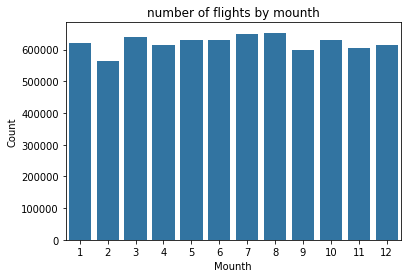

In [15]:
# the distribution by month
sb.countplot(data = df, x = 'Month', color = base_color)
labels('Mounth','Count','number of flights by mounth')

### -As the plot show there are more flights on July and August 

## What about the number of flights by day of week? is there a specific day where the number of  flights are less than usual ?

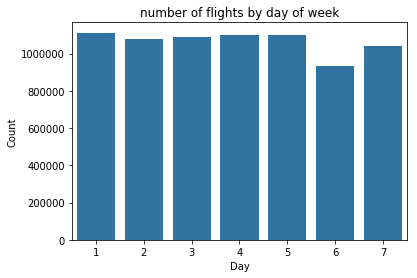

In [16]:
# the distribution by day of week
sb.countplot(data = df, x = 'DayOfWeek', color = base_color)
labels('Day','Count','number of flights by day of week')

### -Saturdays have less flights than other days.

## Now that we have an idea about number of flights by month and day .What is the proportion of cancelled one ?

Text(0.5,1,'proportion of cancelled flights')

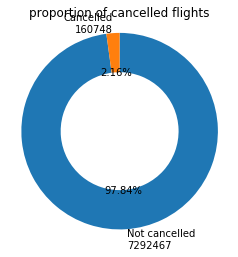

In [17]:
#Proportion of Cancelled flights
cancelled_flights = flights['Cancelled'].value_counts()
labels = f'Not cancelled\n{cancelled_flights.values[0]}', f'Cancelled\n{cancelled_flights.values[1]}'
plt.pie(cancelled_flights, labels =labels, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct='%.2f%%');
plt.axis('square')
plt.title('proportion of cancelled flights')

### -In 2017 160k flights (2.16%) were cancelled.

## What are the main reasons that cause cancellation?

Text(0,0.5,'Count')

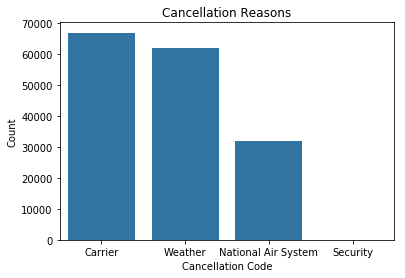

In [18]:
base_color = sb.color_palette()[0]
canc=sb.countplot(data=df, x='CancellationCode', color=base_color,order=['A','B','C','D']);
canc.set_xticklabels(['Carrier','Weather','National Air System','Security']);
canc.set_title('Cancellation Reasons')
canc.set_xlabel('Cancellation Code')
canc.set_ylabel('Count')

### -Most of the flights were cancelled due to Carrier reasons followed by Weather reasons.

In [19]:
# I will create a sub dataset with only the cancelled flights
cancelled = df[df.Cancelled == 1]

In [20]:
# I will create a sub dataset with only the delayed flights
delayed = df[df['ArrDelay']>=15]

## What causes delay?

Text(0.5,1,'delay reasons')

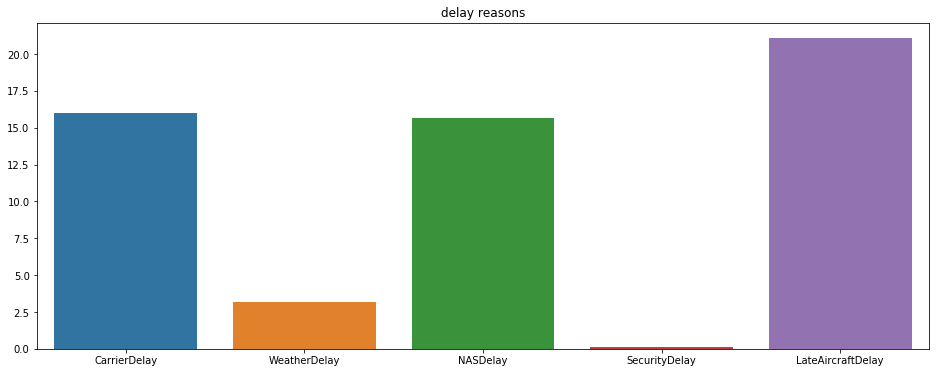

In [21]:
#delayed causes
plt.figure(figsize=(16, 6))
x=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
y = [delayed[i].mean() for i in x]
sb.barplot(x, y)
plt.title('delay reasons')

### -Most of the flights were delayed due to Late air craft reasons followed by carrier reasons.

## Bivariate Exploration


## What is the relationship between departure and arrival delays?

Text(0,0.5,'departure delay')

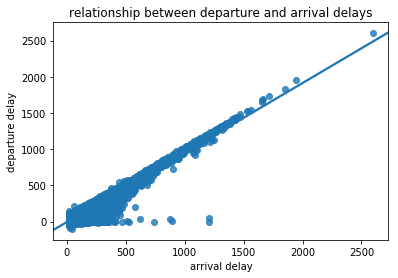

In [22]:
sb.regplot(data=delayed,x='ArrDelay',y='DepDelay').set(title='relationship between departure and arrival delays')
plt.xlabel('arrival delay')
plt.ylabel('departure delay')

### -there is a strong correlation between the departure delay and the arrival delay except for a few points.

## Which month had the most cancellations for each cancellation reason? 

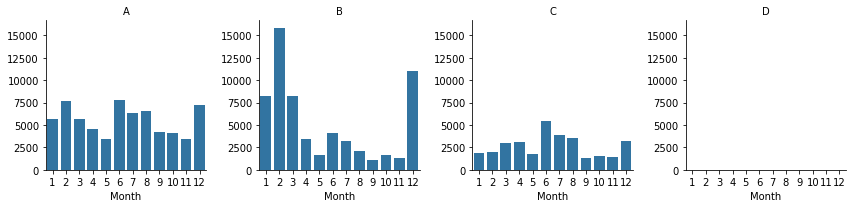

In [23]:
# month that had the most cancellations for each cancellation code
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g=sb.FacetGrid(data=cancelled,col='CancellationCode')
g.map(sb.countplot,'Month',order=month_order).set(title='cancellations reason by month')
g.set_titles("{col_name}");

### -The plot above for "B" : cancellations due to weather ,shows that the months of December, January, February and March had most cancellations.

## Is there any difference between month when we measure  delays?

(-25, 60)

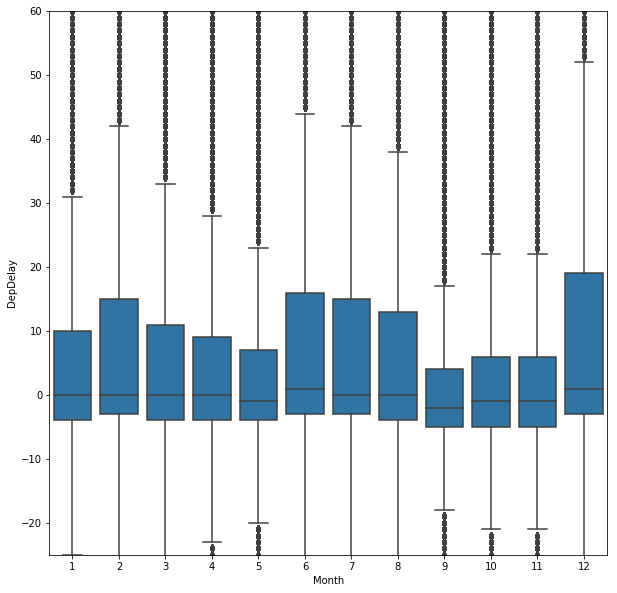

In [24]:
plt.figure(figsize=[10,10])
a=sb.boxplot(data=df, x='Month', y='DepDelay',color=base_color)
plt.ylim(-25,60)

## -There is no statistically difference between month when we measure  delays

## What about the day of the week?

(-30, 50)

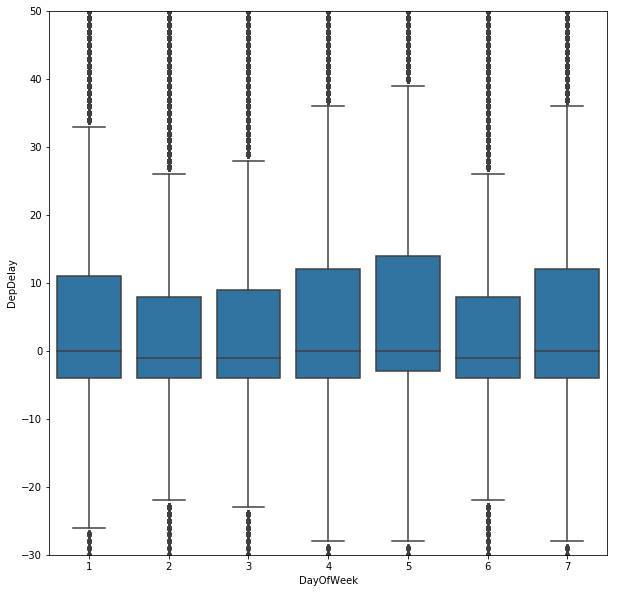

In [25]:
# the day of the week
plt.figure(figsize=[10,10])
sb.boxplot(data=df, x='DayOfWeek', y='DepDelay',color=base_color)
plt.ylim(-30,50)

## -There is no statistically difference between day of week when we measure delays

## Is there any difference between cities when we mesure delays?

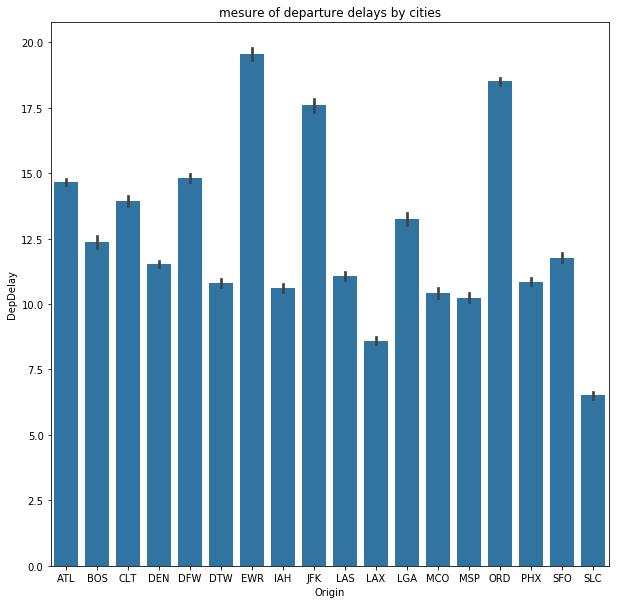

In [26]:
# lets see the cities with major counts
plt.figure(figsize=[10,10])
cities = df.Origin.value_counts().head(18).index.tolist()
flights_cities = df[df.Origin.isin(cities)]
order4 =sorted(cities)
fig=sb.barplot(data=flights_cities, x='Origin',y='DepDelay',color=base_color, order=order4).set(title='mesure of departure delays by cities')

### -EWR (NYC) has the bigest mean delay.

# result when we cancider large delay times

[Text(0.5,1,'mesure of departure delays by cities')]

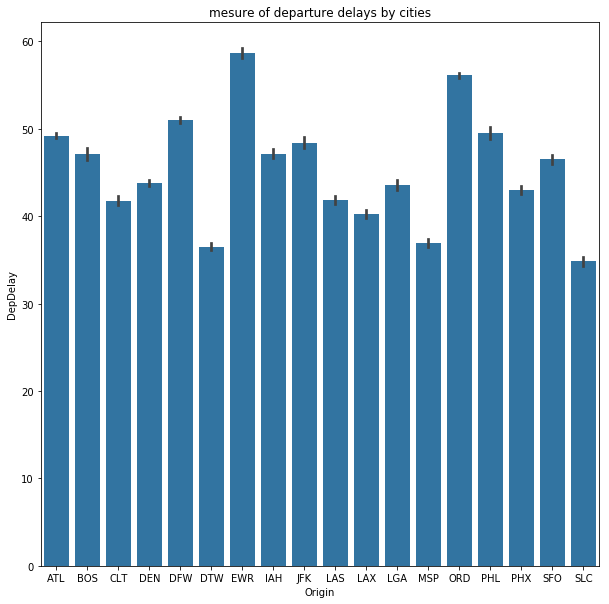

In [27]:

plt.figure(figsize=[10,10])
cities = delayed.Origin.value_counts().head(18).index.tolist()
flights_cities = delayed[delayed.Origin.isin(cities)]
order4 =sorted(cities)
sb.barplot(data=flights_cities, x='Origin',y='DepDelay',color=base_color, order=order4).set(title='mesure of departure delays by cities')

### -for large delays EWR is still first

## What are the cancellation reson in this cities?

[Text(0.5,1,'cancellation reason in cities')]

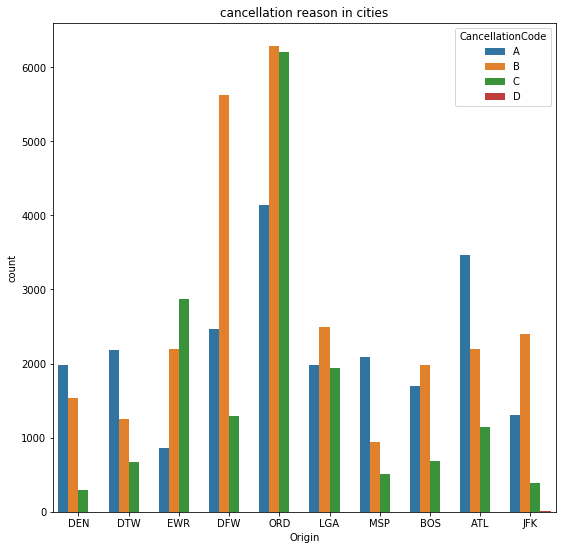

In [28]:
# let's see what are the cancellation reason in this cities 
cancelled_cities = cancelled[cancelled.Origin.isin(cancelled.Origin.value_counts().head(10).index.tolist())]
plt.figure(figsize=[9,9])
sb.countplot(data=cancelled_cities, x='Origin',hue='CancellationCode').set(title='cancellation reason in cities')

### -in all the cities the most frequent cancellation reason is weather (B) but in EWR and ORD the National Air System (C) is also an importan reason. Moreover, in ORD the three main reasons (B, C and Carrier(A)) are really similar.

## What is the relationship between departure delay and carrier delay?

Text(0.5,1,'relationship between departure delay and carrier delay')

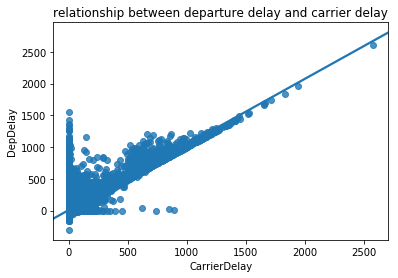

In [29]:
sb.regplot(data=df, x='CarrierDelay',y='DepDelay')
plt.title('relationship between departure delay and carrier delay')

### -there is a strong correlation between the departure delay and the carrier delay .

##   for each month which cancellation reasons is more important ? 

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


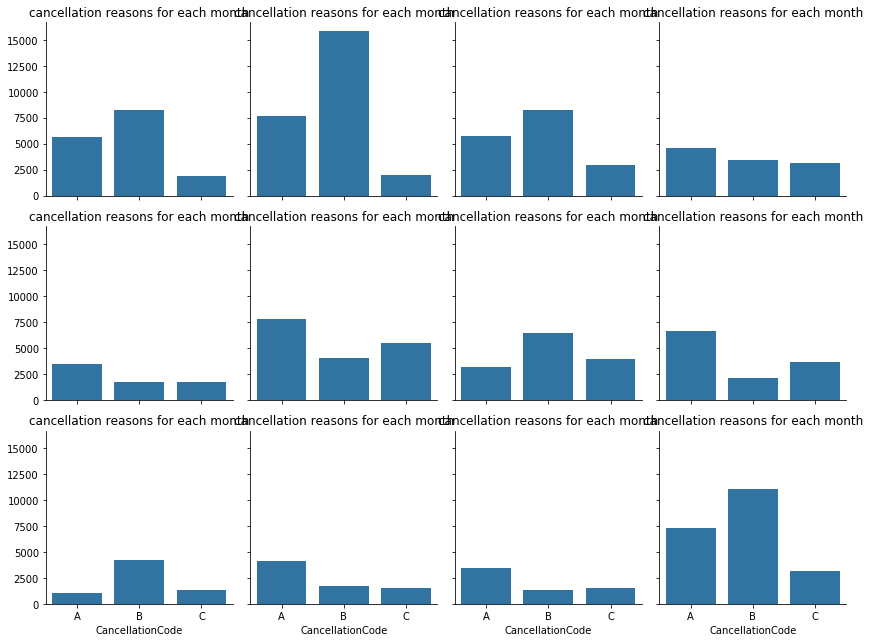

In [30]:
plt.figure(figsize = [12,10])
g=sb.FacetGrid(data = cancelled, col = 'Month', col_wrap=4, size=3)
g.map(sb.countplot, 'CancellationCode').set(title='cancellation reasons for each month')

### -for month 10,11,8,6,4 carrier delays are more important than weather delays.

## Multivariate Exploration


## Is there a specific day of the month where the delays are larger?

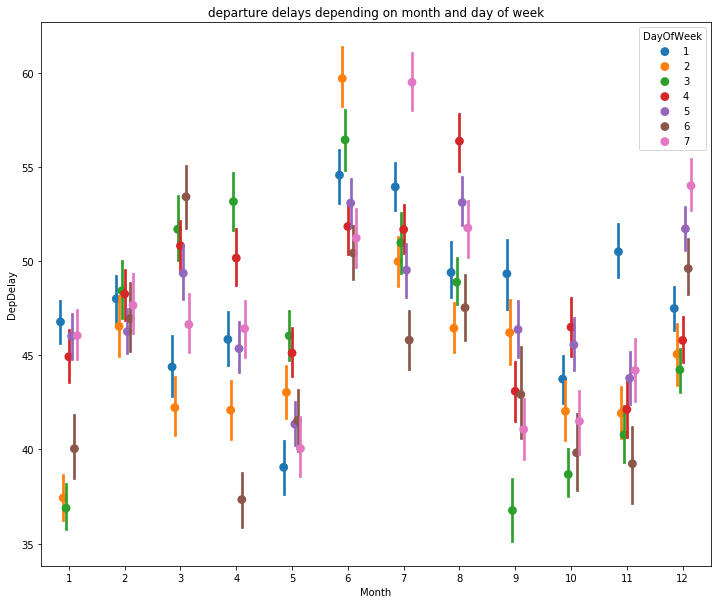

In [31]:
#i will try to combain month and day of week
plt.figure(figsize = [12,10])
sb.pointplot(data = delayed.sample(500000), x = 'Month', y = 'DepDelay', hue = 'DayOfWeek',linestyles = '', dodge = 0.3).set(title='departure delays depending on month and day of week');

### the delays are significantly larger on Tuesday June , Sunday July...
### the delays are significantly lower on wednesday September,Saturday November...




> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

